**Note to grader:** Each question consists of parts, e.g. Q1(i), Q1(ii), etc. Each part must be graded  on a 0-4 scale, following the standard NJIT convention (A:4, B+: 3.5, B:3, C+: 2.5, C: 2, D:1, F:0). 
The total score must be re-scaled to 100 -- that should apply to all future assignments so that Canvas assigns the same weight on all assignments. 



In [ ]:
# Grader's area
import numpy as np
M = np.zeros([10,10])
maxScore = 0


# **Assignment 3**

The goal in this assignment to work a little more with Python, do some practice with logistic regression, reflect on how it can fail to work on linearly separable data. You will also work with a support vector classifier. All that, still on "toy" data sets. 

We will work with the first 'real' data sets in the next assignment. 

## **Preparation Steps**

In [ ]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression

In [ ]:
# ### Reading-in the Iris data

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/");
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


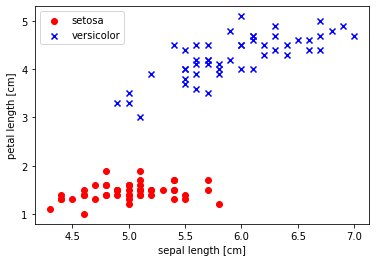

In [ ]:
# select setosa and versicolor for binary classification
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [ ]:
# function for visualizing decision regions

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

-----------------------
-----------------------
-----------------------


## <font color = 'blue'> **Question 1. Practice with logistic regression** </font>

Let's first load the textbook's implementation of logistic regression with gradient descent.

In [ ]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    loss_ : list
      Logistic loss function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.loss_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # compute the logistic `loss` 
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.loss_.append(loss)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Below you can see the first 3 data points of the data set, all labeled as 'setosa'. Let's set the numerical value for 'setosa' to 1. (i.e. y = 1). 

In [ ]:
X[0:3]

array([[5.1, 1.4],
       [4.9, 1.4]])


Suppose the initial weights of the logistic neuron are w0=0.1, w1=-0.2, w2=0.1

<font color = 'blue'> **Q1-1**.  </font> Write the weights after processing data points 0,1,2, with learning rate $\eta=0.1$ and show your calculations. This is similar to the previous assignment, only done now for the logistic neuron. You can also use *LogisticRegressionGD* to check your calculations. <br>

<font color = 'blue'> **Q1-2**.  </font> Given our data $X$, let $X_{d=2}$ and $X_{d=3}$ be the quadratic and cubic features. Using code from the notebook on polynomial regression, generate $X_{d=2}$ and $X_{d=3}$

<font color = 'blue'> **Q1-3**.  </font> Using *LogisticRegressionGD* fit $X$, $X_{d=2}$ and $X_{d=3}$. Here you should set $\eta = 0.1$ and $n_{iter}>1000$. For each of these three cases, report the loss function value for the model computed by *LogisticRegressionGD*.
Here it is expected that the loss value decreases as $d$ increases. 


In [ ]:
# your calculations and code go here

In [ ]:
# Grader's area

maxScore = maxScore +12
#M[1,1] = 
#M[1,2] = 
#M[1,3] =

-----------------------
-----------------------
-----------------------


## <font color = 'blue'> **Question 2. A theoretical question** </font>

This question is about a theoretical explanation for what you observed in question 1(iii). 

<br>

Suppose $f_1$ is a model that optimally fits the data $(X,y)$, and $f_2$ is another model that optimally fits the data $(X_2,y)$ where $X_2$ are the quadratic features of $X$. Then the loss function value obtained by $f_2$ is **always** going to be at least equal to that for $f_1$. Try to come up with a solid mathematical argument that justifies this claim. [Note: as with anything else, feel free to discuss this on Canvas]

(your answer goes here)

In [ ]:
# Grader's area

maxScore = maxScore + 4
#M[2,1] = 


-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 3. Logistic Regression: How 'unfair' can it be?**  </font>

We have seen that the inductive bias of an SVC guarantees that when the dataset is linearly separable, SVC will return a hyperplane that is at exactly the same distance from the two classes.  But what about logistic regression? Can we guarantee that it can also be at least partially fair?

The answer is **negative**. We can  demonstrate how logistic regression can be 'unfair' by constructing a dataset with the properties that: <br> 

**a.** the data set is linearly separable  <br>
**b.** the optimal logistic regression model corresponds to a hyperplane that nearly 'touches' one of the two classes, i.e. it gives a very big margin to the one of the two classes and very small margin for the other class.  <br>

Demonstrate your answer as follows: <br>

<font color = 'blue'> **Q3-1**.  </font>
 Plot the data points, as we did above for the iris data set. This will show that your data set is linearly separable. <br>
<font color = 'blue'> **Q3-2**.  </font> Calculate the optimal logistic neuron weights using the function *LogisticRegressionGD* from question 1. <br>
<font color = 'blue'> **Q3-3**. </font>  Plot the decision regions to demonstrate how the learned separation line is unfair. 

**Hint**: Try small datasets.
**Note**: It's best to use fresh variables for your dataset, because the previous $X,y$ are re-used in question 4.


In [ ]:
# your answers go here

In [ ]:
# Grader's area

maxScore = maxScore + 12
#M[3,1] = 
#M[3,2] = 
#M[3,3] = 


<font color = 'blue'> **Q3-4**.  </font> The standard scikit-learn implementation of logistic regression uses regularization by default ($C=1$).  Can you come up with a linearly separable dataset that makes that **default** implementation fail? <br>

[Note: This is an experimental question. You should be able to use the example from above, or modify it, and make the default implementation fail.]

In [ ]:
# your answer goes here

In [ ]:
# Grader's area
maxScore = maxScore + 4

# M[3,4] = 

-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 4. SVC and classification margin**  </font>

The Iris dataset defined in above cells is linearly separable. 

<font color = 'blue'> **Q4-1.**  </font> Use a [linear SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) to learn a hyperplane $y=w_1x_1 +w_2x_2 +b$ that maximizes the margin for this Iris dataset. In your answer, specify a setting for the hyperparameter $C$ that reduces the amount of regularization, i.e. it incentivizes very small slacks.

<font color = 'blue'> **Q4-2.** </font> Extract the coefficients $w$ and the intercept $b$ from the learned SVC. Find the the 2-norm of $w$, $s = ||w||_2$.
[Hint: Read the documentation in order to access the coefficients] 

<font color = 'blue'> **Q4-3.** </font> Set $w = w/s$ and $b=b/s$. This changes the numerical definition of the separation line, but the line is still the same.  

<font color = 'blue'> **Q4-4.** </font> With the new $w$ and $b$, calculate $wx^T - b$ for each point $x$ in our dataset. This will give a range of values, let $\gamma$ be the smallest one in absolute value. This $\gamma$ is the margin (in fact there should be two points $x_1$ and $x_2$ of different labels, that give $wx_1^T - b = \gamma$ and $wx_1^T - b = -\gamma$). 


**Note:** as with anything else, feel free to discuss this on Canvas.

In [ ]:
# Grader's area

maxScore = maxScore + 16
#M[4,1] = 
#M[4,2] = 
#M[4,3] = 
#M[4,4] = 


-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 5. Upper bound for perceptron errors before convergence**  </font>

In this problem we will use $\gamma$ calculated in question 4. If you have not been able to calculate it, you can 'borrow' its value from someone else that has calculated it (I expect that this can be done on Canvas).

<font color = 'blue'> **Q5-1.** </font> Calculate $R = \max_{x\in X} ||x||_2$. In other words, find the 2-norm of all points in the dataset, and let $R$ be the maximum norm. 

<font color = 'blue'> **Q5-2.** </font> Calculate $maxErrors = R/\gamma^2$. This is the maximum number of errors that a perceptron can do, in the worst case, before it convergences. 

<font color = 'blue'> **Q5-3.** </font> Compare $maxError$ with the actual number of errors that the perceptron does with a random initialization. [Hint: Re-use the code from assignment 2, or anything else that can provide you with that number].  




In [ ]:
# your answers go here

In [ ]:
# Grader's area

maxScore = maxScore + 12
#M[5,1] = 
#M[5,2] = 
#M[5,3] = 
 


----------------------------
----------------------------
----------------------------

In [ ]:
#Grader's area

rawScore = np.sum(M)
score = rawScore*100/maxScore